In [ ]:
#Importing Libraries Needed
import collections
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Task 1 - Python** 

Write a function that takes a list of numbers as an input and counts the number of occurrences of each number in the list. <br>  The output should be a dictionary whose keys are the numbers. For each key, the corresponding value should be its number of occurrences.
<br> For example, if the input is [1, 5, 1, 2, 2, 3, 4, 4], the output should be {'1': 2, '2': 2, '3': 1, '4': 2, '5':1}

In [ ]:
#CODE
def numbers_count(input_list):
  my_dict={}
  for item, count in collections.Counter(input_list).items():
    my_dict[str(item)]=count
  output_dict = dict(sorted(my_dict.items(), key = lambda x:x[0]))
  return output_dict
#TEST
numbers_count([1, 5, 1, 2, 2, 3, 4, 4])

{'1': 2, '2': 2, '3': 1, '4': 2, '5': 1}

# Task 2 - Data Manipulation

Provide info about [this](https://www.kaggle.com/shivamb/netflix-shows) dataset:
1. How many rows, columns?
2. How many null values?
3. Are there any duplicates?
4. Visualize the show types using a suitable plot.

In [ ]:
netflix_df= pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#TEST
netflix_df.shape

(8807, 12)

**Rows:** 8807

**Columns:** 12

In [ ]:
#TEST
netflix_df.isnull().sum().sum()

4307

**Null values number:** 4307

In [ ]:
#TEST
netflix_df.duplicated().sum()

0

**There's no duplicates in data**

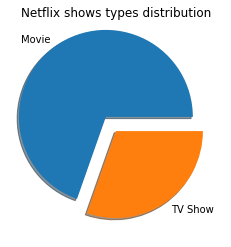

In [ ]:
percentage = netflix_df['type'].value_counts()
mylabels = netflix_df['type'].unique()
plt.pie(percentage, labels = mylabels, explode = [0.2, 0], shadow = True)
plt.title('Netflix shows types distribution')
plt.show() 

# **Task 3 - Bonus** 
### This task was prepared by Eng. Muhammad Al Aref

Now let's use what we learned so far to *estimate $\pi$*!

Consider a dart board shaped like a circle enclosed by a square and you are throwing darts at it. You are very good and you never land a dart off the square but you are not aiming for anything in particular inside it, so a dart has an equal chance of falling anywhere inside the square!

Then, the chance of a dart to fall inside the circle is the ratio of the circle area to the square area. $$p(circle) = \dfrac{circle\ area}{square\ area} = \dfrac{\pi r^2}{(2r)^2} = \dfrac{\pi}{4}$$ This means that $$\pi = 4 * p(circle)$$

Now, the remaining question is, how do we estimate the probability? We can do that by simulating random thrown darts, counting the ones that land inside the circle and divide that by the total number of thrown darts!

$$p(circle) = \dfrac{number\ of\ darts\ inside\ the\ circle}{total\ number\ of\ darts}$$

That way of estimating probabilites is called *Monte Carlo* simulation. <br>
Hint: Use Python's `Random` Library

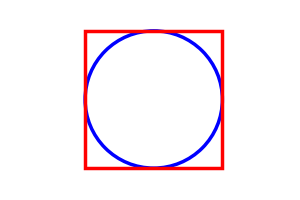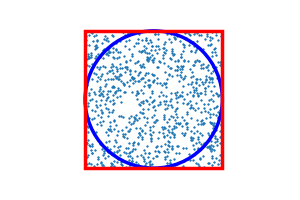

In [ ]:
from math import pi as original_pi
def CircleProb(x,y):
  c=0
  for i in range(len(x)):
    if math.sqrt(x[i]**2 + y[i]**2) <= 1.0:
      c+=1
  allpts=len(x)
  probability=c/allpts
  calc_pi=4*probability
  error=100*abs(original_pi-calc_pi)/original_pi
  return allpts,c,probability,calc_pi,error

In [ ]:
x = [random.uniform(-1, 1) for _ in range(1000)]
y = [random.uniform(-1, 1) for _ in range(1000)]
allpts,c,probability,calc_pi,error= CircleProb(x,y)
print("The number of total points is: {}  and number of points inside the circle: {} with probability: {} and Pi values is: {} with an error: {}% ".format(allpts,c,probability,calc_pi,error))

The number of total points is: 1000  and number of points inside the circle: 774 with probability: 0.774 and Pi values is: 3.096 with an error: 1.4512592374984015% 


Increasing number of points increases the accuracy of the Pi constant as shown below


In [ ]:
new_x = [random.uniform(-1, 1) for _ in range(10000)]
new_y = [random.uniform(-1, 1) for _ in range(10000)]
allpts2,c2,probability2,calc_pi2,error2= CircleProb(new_x,new_y)
print("The number of total points is: {}  and number of points inside the circle: {} with probability: {} and Pi values is: {} with an error: {}%".format(allpts2,c2,probability2,calc_pi2,error2))

The number of total points is: 10000  and number of points inside the circle: 7833 with probability: 0.7833 and Pi values is: 3.1332 with an error: 0.2671464608947034%
